# <center>simulation

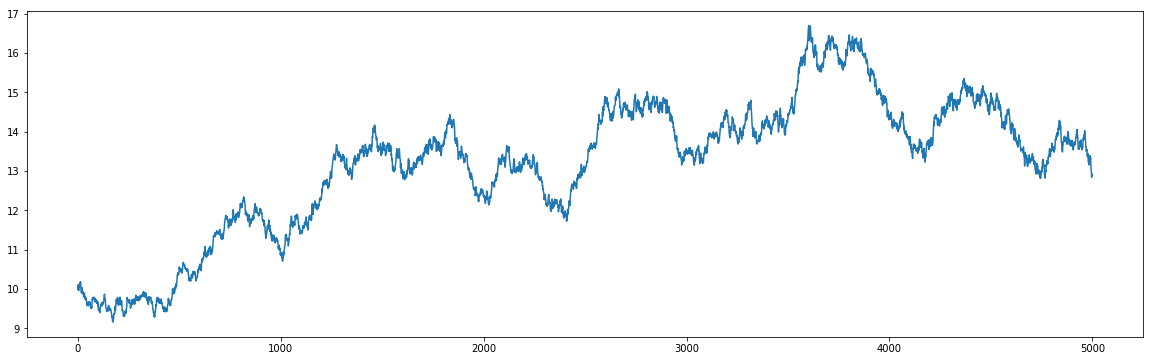

In [105]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import random

random.seed(992)
t = 5000
sigma=0.005
pf = np.zeros(t)
pf[0] =10 #initial pf
for i in range(1,t):
    pf[i]=pf[i-1]*math.e**(random.gauss(0,sigma))
plt.figure(figsize=(20,6))
plt.plot(pf)
plt.show()


In [106]:
class agent:
    def __init__(self):
        self.group=None
        

In [107]:
N=500#total number of agent 
min_num=int(N*0.008)
nc_p=min_num#min_num
nc_m=min_num#min_num
nc=nc_p+nc_m
nf=N-nc_p-nc_m
print(nf)
grouplist=[]
for i in range(nc_p):
    grouplist.append('opti')
for i in range(nc_m):
    grouplist.append('pass')
for i in range(nf):
    grouplist.append('fund')

agentlist=[]
for i in range(N):
    a_agent=agent()
    a_agent.group=grouplist[i]
    agentlist.append(a_agent)

492


In [108]:
gamma=0.01
vc=0.001##tc
v1=2
v2=0.6
beta=4
a1=0.6
a2=1.5
a3=1
R=0.0004
s=0.75
#t=1000#大step
step=500##小step
plag=100#改step也要改这个
price=10
#pf=10
price_temp=[price]*plag
result_pricelist=[]
result_nc_p=[]
result_nc_m=[]
result_nf=[]
result_dailyprice=[]
result_nc=[]
for j in range(t):
    result_dailyprice.append(price)   
    result_nc_p.append(nc_p)
    result_nc_m.append(nc_m)
    result_nf.append(nf)
    result_nc.append(nc_p+nc_m)
    for i in range(step): ###外层更新pf！


        pdot=(price-price_temp[0])/(plag/step)          ##要用0.2内的100步的平均收益！

        u1=a1*(nc_p-nc_m)/(nc_p+nc_m)+a2*pdot/(v1*price)        ######最后要更新pricetemp，
        u21=a3*((R*pf[j]+pdot/v2)/price-R-s*abs((pf[j]-price)/price))### s,R 
        u22=a3*(R-(R*pf[j]+pdot/v2)/price-s*abs((pf[j]-price)/price))

        p_opti_to_fund=v2*nf/N*math.e**(-u21)/step   ###possion rate 除500，deltat=0.002
        p_opti_to_pass=v1*nc/N*math.e**(-u1)/step

        p_fund_to_opti=v2*nc_p/N*math.e**(u21)/step
        p_fund_to_pass=v2*nc_m/N*math.e**(u22)/step

        p_pass_to_opti=v1*nc/N*math.e**(u1)/step
        p_pass_to_fund=v2*nf/N*math.e**(-u22)/step

        for agent in agentlist:
            ##各个group转换
            if agent.group=='fund':

                if (random.uniform(0,1)<p_fund_to_opti) and (nf>min_num):
                    agent.group='opti'
                    nf-=1
                    nc_p+=1
                elif (random.uniform(0,1)>(1-p_fund_to_pass)) and (nf>min_num):
                    agent.group='pass'
                    nf-=1
                    nc_m+=1

            if agent.group=='pass':

                if (random.uniform(0,1)<p_pass_to_fund) and (nc_m>min_num):
                    agent.group='fund'
                    nc_m-=1
                    nf+=1
                elif (random.uniform(0,1)>(1-p_pass_to_opti)) and (nc_m>min_num):
                    agent.group='opti'
                    nc_m-=1
                    nc_p+=1

            if agent.group=='opti':

                if (random.uniform(0,1)<p_opti_to_pass) and (nc_p>min_num):
                        agent.group='pass'
                        nc_p-=1
                        nc_m+=1
                elif (random.uniform(0,1)>(1-p_opti_to_fund)) and (nc_p>min_num):
                        agent.group='fund'
                        nc_p-=1
                        nf+=1                

        price_temp=price_temp[1:]+[price]#更新price——temp

        ed=(nc_p-nc_m)*vc+nf*gamma*(pf[j]-price)/price
        #print(nc_p-nc_m)
        if ed>0:##上涨
            if random.uniform(0,1)< max(0,beta*ed):
                price=1.001*price
        elif ed<0:  ##下跌
            if random.uniform(0,1)< -min(beta*ed,0):
                price=0.999*price

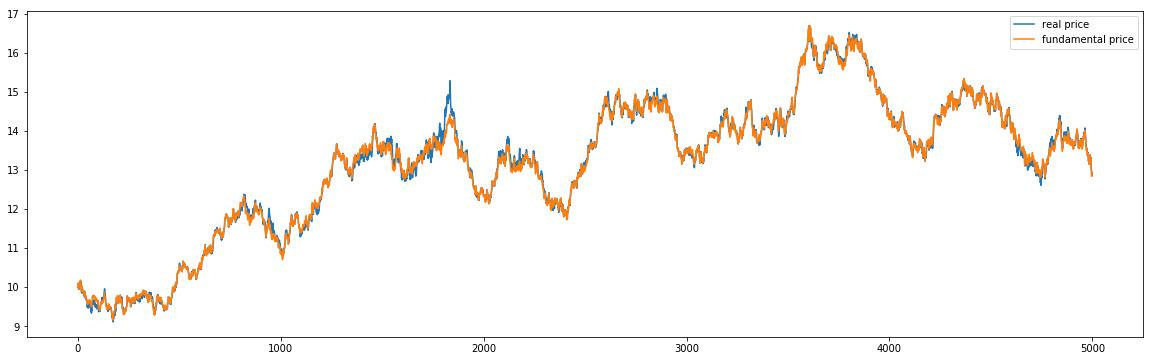

In [109]:
plt.figure(figsize=(20,6))
plt.plot(result_dailyprice,label='real price')
plt.plot(pf,label='fundamental price')
plt.legend()

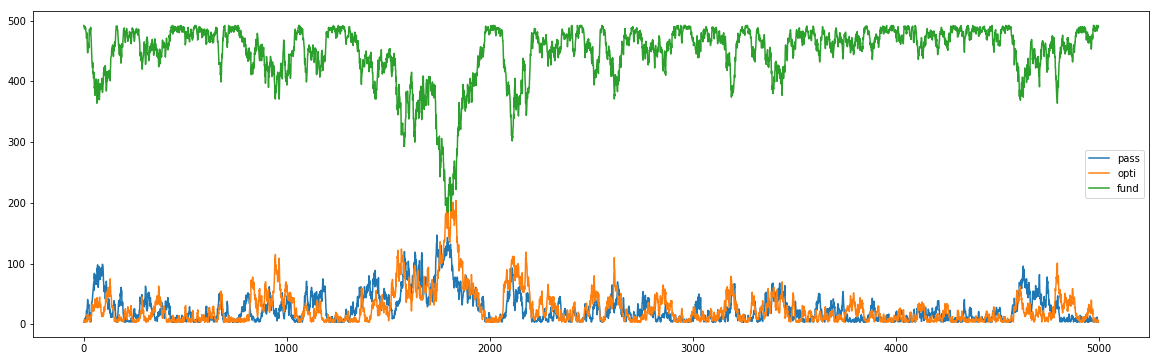

In [110]:
plt.figure(figsize=(20,6))
plt.plot(result_nc_m,label='pass')
plt.plot(result_nc_p,label='opti')
plt.plot(result_nf,label='fund')
plt.legend()

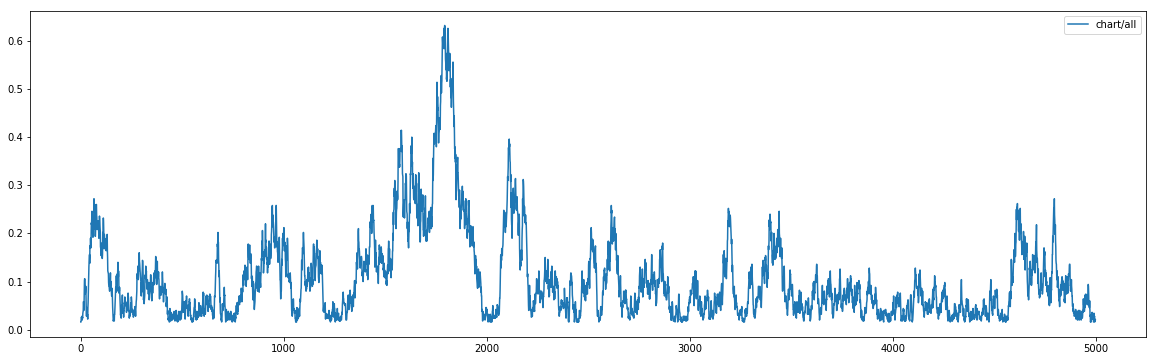

In [112]:
# dvid=[]
# for i in range(len(result_nc)):
#     dvid.append(result_nc[i]/result_nf[i])
plt.figure(figsize=(20,6))
plt.plot(np.array(result_nc)/N,label='chart/all')
plt.legend()

In [275]:
result_logrt=[]
pf_logrt=[]
for i in range(1,len(result_dailyprice)):
    result_logrt.append(math.log(result_dailyprice[i]/result_dailyprice[i-1]))
    pf_logrt.append(math.log(pf[i]/pf[i-1]))

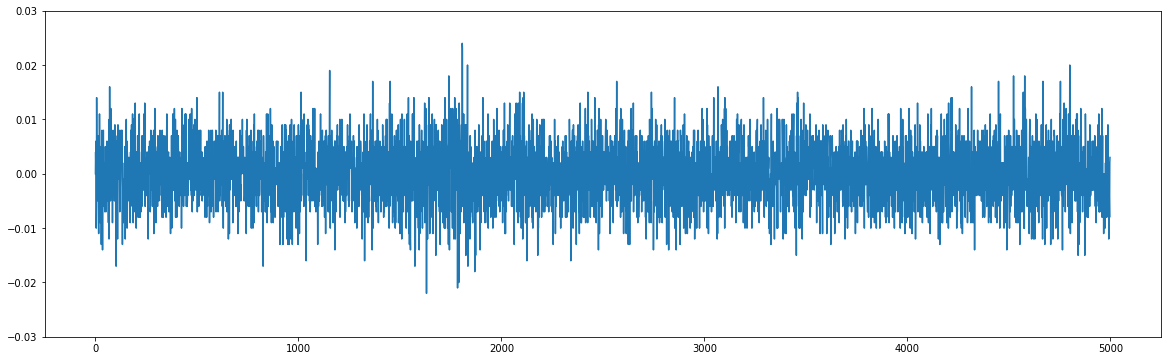

In [276]:
plt.figure(figsize=(20,6))
plt.plot(result_logrt)
plt.ylim(-0.03,0.03)
plt.show()

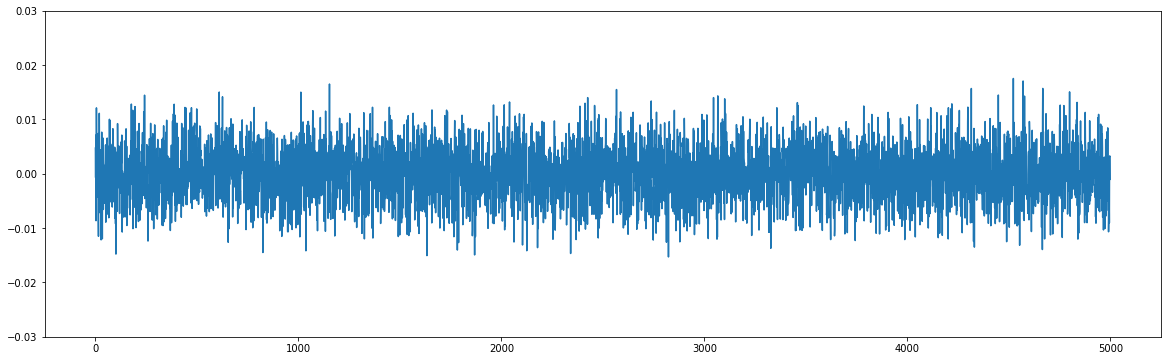

In [123]:
plt.figure(figsize=(20,6))
plt.plot(pf_logrt)
plt.ylim(-0.03,0.03)
plt.show()

0.005502999048209717

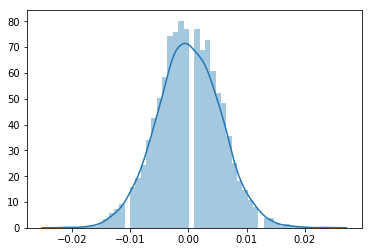

In [118]:
sns.distplot(result_logrt)
np.array(result_logrt).std()
#均值方差

0.004968639185604534

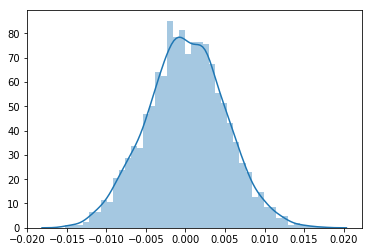

In [119]:
sns.distplot(pf_logrt)
np.array(pf_logrt).std()

## <center> thesis data (data_5000_times.npz)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import pandas as pd
import scipy.stats
import scipy
from statsmodels.distributions.empirical_distribution import ECDF
import scipy
import seaborn as sns
dic = {"price_log":0,
        "price_fund_log":1,
        "opt_num_log":2,
        "pes_num_log":3,
        "chart_index_log":4,
        "fund_num_log":5,
        "opinion_index":6}

with np.load("data_5000_times.npz") as data:#data_5000_s_t_65
    fetch = [data[key] for key in data]


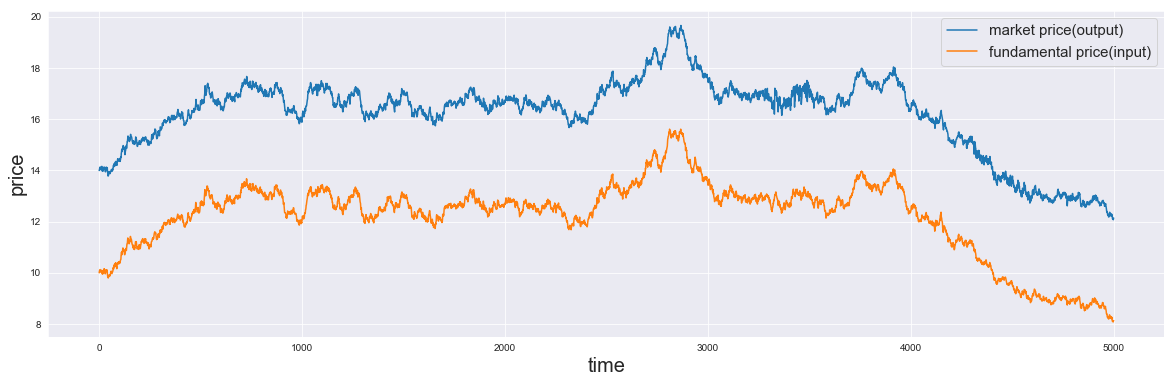

In [3]:
pf=fetch[dic["price_fund_log"]]
result_dailyprice=fetch[dic["price_log"]]

sns.set_style("darkgrid")
plt.figure(figsize=(20,6))
plt.plot(result_dailyprice+4,label='market price(output)')
plt.plot(pf,label='fundamental price(input)',alpha=1)
plt.xlabel('time',fontsize=20)
plt.ylabel('price',fontsize=20)
plt.legend(fontsize=15)

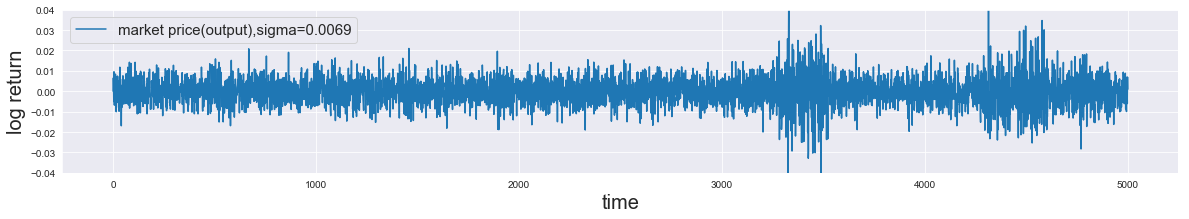

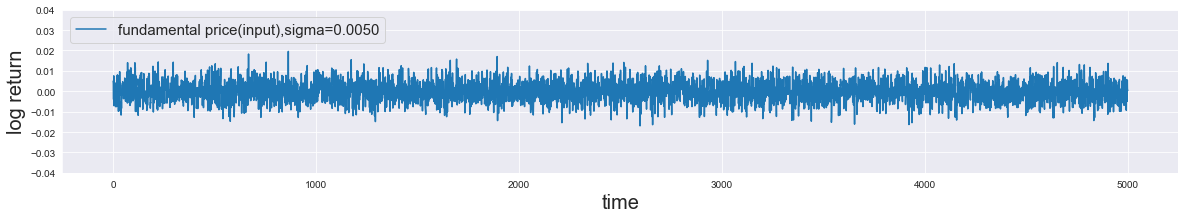

In [4]:

pf_log=np.diff(np.log(pf),n=1)
result_dailyprice_log=np.diff(np.log(result_dailyprice),n=1)

sns.set_style("darkgrid")
plt.figure(figsize=(20,3))
plt.plot(result_dailyprice_log,label='market price(output),sigma=%.4f'%result_dailyprice_log.std())
plt.ylim(-0.04,0.04)
plt.legend(fontsize=15,loc='upper left')
plt.xlabel('time',fontsize=20)
plt.ylabel('log return',fontsize=20)
plt.figure(figsize=(20,3))
plt.plot(pf_log,label='fundamental price(input),sigma=%.4f'%pf_log.std())
plt.ylim(-0.04,0.04)
plt.legend(fontsize=15,loc='upper left')
plt.xlabel('time',fontsize=20)
plt.ylabel('log return',fontsize=20)
plt.show()

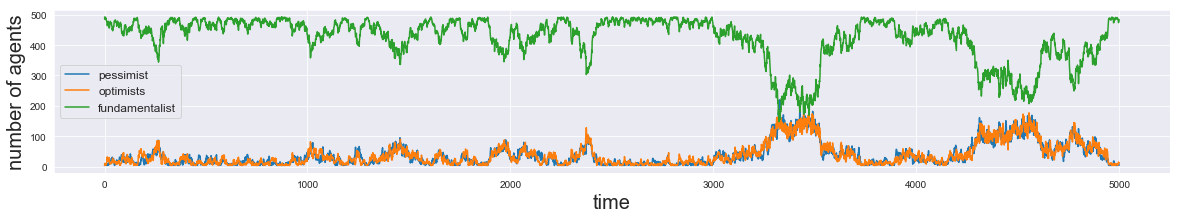

In [5]:
result_nf=fetch[dic["fund_num_log"]]
result_nc_p=fetch[dic["pes_num_log"]]
result_nc_o=fetch[dic["opt_num_log"]]
sns.set_style("darkgrid")
plt.figure(figsize=(20,3))
plt.plot(result_nc_p,label='pessimist')
plt.plot(result_nc_o,label='optimists')
plt.plot(result_nf,label='fundamentalist')
plt.xlabel('time',fontsize=20)
plt.ylabel('number of agents',fontsize=20)
plt.legend(fontsize=12)
plt.show()

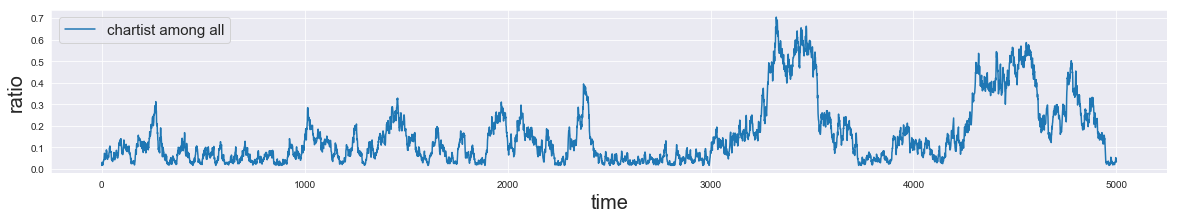

In [6]:
N=500
sns.set_style("darkgrid")
plt.figure(figsize=(20,3))
plt.plot((result_nc_p+result_nc_o)/N,label='chartist among all')
plt.xlabel('time',fontsize=20)
plt.ylabel('ratio',fontsize=20)
plt.legend(fontsize=15)
plt.show()

# <center>power law

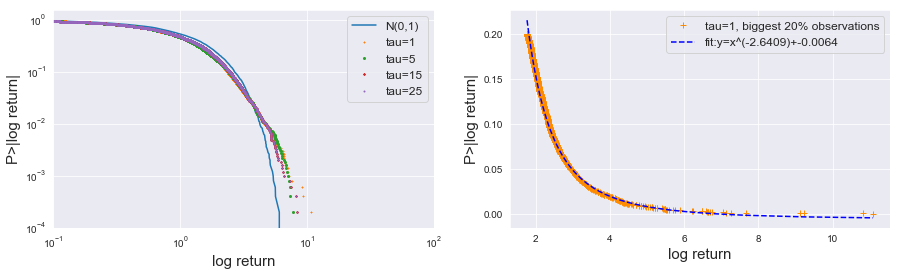

In [20]:
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
pf=fetch[dic["price_fund_log"]]
result_dailyprice=fetch[dic["price_log"]]
pf_logrt=abs(np.diff(np.log(pf),n=1))/abs(np.diff(np.log(pf),n=1)).std()
result_logrt_1=abs(np.diff(np.log(result_dailyprice),n=1))/abs(np.diff(np.log(result_dailyprice),n=1)).std()
result_logrt_5=abs(np.diff(np.log(result_dailyprice),n=5))/abs(np.diff(np.log(result_dailyprice),n=5)).std()
result_logrt_15=abs(np.diff(np.log(result_dailyprice),n=15))/abs(np.diff(np.log(result_dailyprice),n=15)).std()
result_logrt_25=abs(np.diff(np.log(result_dailyprice),n=25))/abs(np.diff(np.log(result_dailyprice),n=25)).std()

ecdf_standard=ECDF(pf_logrt)
ecdf_1=ECDF(result_logrt_1)
ecdf_5=ECDF(result_logrt_5)
ecdf_15=ECDF(result_logrt_25)
ecdf_25=ECDF(result_logrt_25)

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)




plt.loglog(ecdf_standard.x,1-ecdf_standard.y,label='N(0,1)')
plt.loglog(ecdf_1.x,1-ecdf_1.y,'+',label='tau=1',linewidth=0,markersize=2)
plt.loglog(ecdf_5.x,1-ecdf_5.y,'o',label='tau=5',linewidth=0,markersize=2)
plt.loglog(ecdf_15.x,1-ecdf_15.y,'*',label='tau=15',linewidth=0,markersize=2)
plt.loglog(ecdf_25.x,1-ecdf_25.y,'.',label='tau=25',linewidth=0,markersize=2)

########3
# plt.loglog(ecdf_standard.x,1-ecdf_standard.y,label='N(0,1)')
# plt.loglog([ecdf_1.x[i] for i in range(0,len(ecdf_1.x),1)],
#             [1-ecdf_1.y[i] for i in range(0,len(ecdf_1.y),1)],'+',label='N(0,1)',linewidth=0,markersize=2)
# plt.loglog(ecdf_1.x,1-ecdf_1.y,'+',label='tau=1',linewidth=0)
# plt.loglog(ecdf_5.x,1-ecdf_5.y,'o',label='tau=5',linewidth=0)
# plt.loglog(ecdf_15.x,1-ecdf_15.y,'*',label='tau=15',linewidth=0)
# plt.loglog(ecdf_25.x,1-ecdf_25.y,'.',label='tau=25',linewidth=0)

plt.legend(fontsize=12)
plt.xlim(1e-1,1e2)
plt.ylim(bottom=1e-4)
plt.xlabel('log return',fontsize=15)
plt.ylabel('P>|log return|',fontsize=15)

#ax.set_xlim(1e-0,1e-2)

def fund(x, a, b):
    return x**(-a) + b

  
xdata = ecdf_1.x[4000:]
ydata = 1-ecdf_1.y[4000:]
plt.subplot(1,2,2)
plt.plot(xdata,ydata,color='darkorange',label='tau=1, biggest 20% observations',marker='+',linewidth=0)
popt, pcov = curve_fit(fund, xdata, ydata)
#popt数组中，三个值分别是待求参数a,b,c
y2 = [fund(i, popt[0],popt[1]) for i in xdata]
plt.plot(xdata,y2,'b--',label='fit:y=x^(-%.4f)+%.4f'%(popt[0],popt[1]))
plt.xlabel('log return',fontsize=15)
plt.ylabel('P>|log return|',fontsize=15)
plt.legend(fontsize=12)
plt.show()

# <center>Test ARCH effect

In [323]:
# 相关库
from scipy import  stats
import statsmodels.api as sm  # 统计相关的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=np.diff(np.log(result_dailyprice),n=1)
t = sm.tsa.stattools.adfuller(data)  # ADF检验
print ("p-value:%s"%t[1])##<0.05,平稳

p-value:0.0


In [324]:
print('p-value:',acorr_ljungbox(data,12)[1][-1])##LB test,<0.05, exist serial correlation

p-value: 6.824285395128183e-24


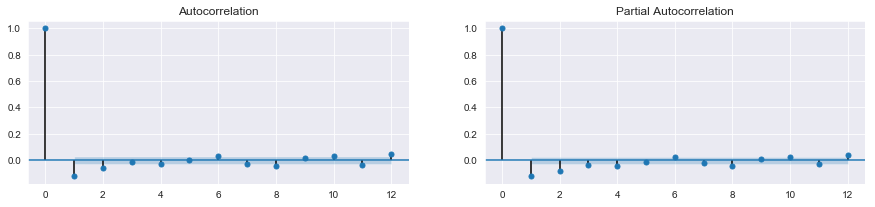

In [337]:
fig = plt.figure(figsize=(15,3))
ax1=fig.add_subplot(121)
fig = sm.graphics.tsa.plot_acf(data,lags = 12,ax=ax1)
ax1=fig.add_subplot(122)
fig = sm.graphics.tsa.plot_pacf(data,lags = 12,ax=ax1)

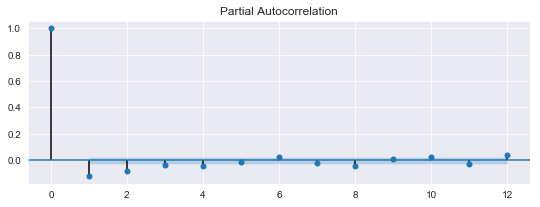

In [145]:
order = (8,2)
model = sm.tsa.ARMA(data,order).fit()
at = data -  model.fittedvalues
at2 = np.square(at)
# plt.figure(figsize=(10,6))
# plt.subplot(211)
# plt.plot(at,label = 'at')
# plt.legend()
# plt.subplot(212)
# plt.plot(at2,label='at^2')
# plt.legend(loc=0)

print('p-value:',acorr_ljungbox(at,12)[1][-1])##LB test,>0.05, 剩余序列 not exist serial correlation
print('p-value:',acorr_ljungbox(at2,12)[1][-1])##LB test,<0.05, exist ARCH effect

p-value: 0.4550602032545382
p-value: 1.4254858638383913e-254
